In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Ćwiczenie 1

In [4]:
df = pd.read_csv('./data/dataset-1.csv', sep=',', names=['data'])
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
data,-1.0,0.411835,0.386212,-0.446688,-0.258951,-0.498624,0.315777,-0.548124,-0.057541,0.45882,...,-0.939246,0.062258,0.86335,0.226851,0.499091,0.663676,0.065976,0.874778,0.343655,0.711119


### Zadanie 1 - wartość średnia, wariancja i odchylenie standardowe przy pomocy funkcji wbudowanych

In [5]:
mean = float(df.loc[:, 'data'].mean())
var = float(df.loc[:, 'data'].var())
std = float(df.loc[:, 'data'].std())

print(f'{mean=:.4f}, {var=:.4f}, {std=:.6f}:{np.sqrt(var):.6f}')

mean=0.0142, var=0.3270, std=0.571859:0.571859


### Zadanie 2 - wartość średnia, wariancja i odchylenie standardowe bez funkcji wbudowanych

In [7]:
df.loc[:, 'cumsum'] = df.loc[:, 'data'].cumsum()
mean = df.loc[999, 'cumsum'] / len(df.loc[:, 'data'])
df.loc[:, 'cumsum (x-mean)^2'] = df.loc[:, 'data'].apply(lambda x: (x-mean)**2).cumsum()
var = df.loc[999, 'cumsum (x-mean)^2'] / (len(df.loc[:, 'data']) - 1)
std = np.sqrt(var)
print(f'{mean=:.4f}, {var=:.4f}, {std=:.6f}')
df

mean=0.0142, var=0.3270, std=0.571859


,data,cumsum,cumsum (x-mean)^2
0,-1.000000,-1.000000,1.028618
1,0.411835,-0.588165,1.186725
2,0.386212,-0.201953,1.325112
3,-0.446688,-0.648641,1.537537
4,-0.258951,-0.907593,1.612154
...,...,...,...
995,0.663676,12.212584,325.357723
996,0.065976,12.278560,325.360403
997,0.874778,13.153338,326.100984
998,0.343655,13.496993,326.209519


### Zadanie 4 - mediana wyznaczyć z i bez funkcji

In [8]:
median_1 = df.copy().sort_values('data').reset_index(drop=True).loc[[499, 500], 'data'].sum() / 2
median_2 = df.loc[:, 'data'].median()
print(f'{median_1=:.4f}, {median_2=:.4f}')

median_1=0.0243, median_2=0.0243


### Zadanie 3 - narysować histogram

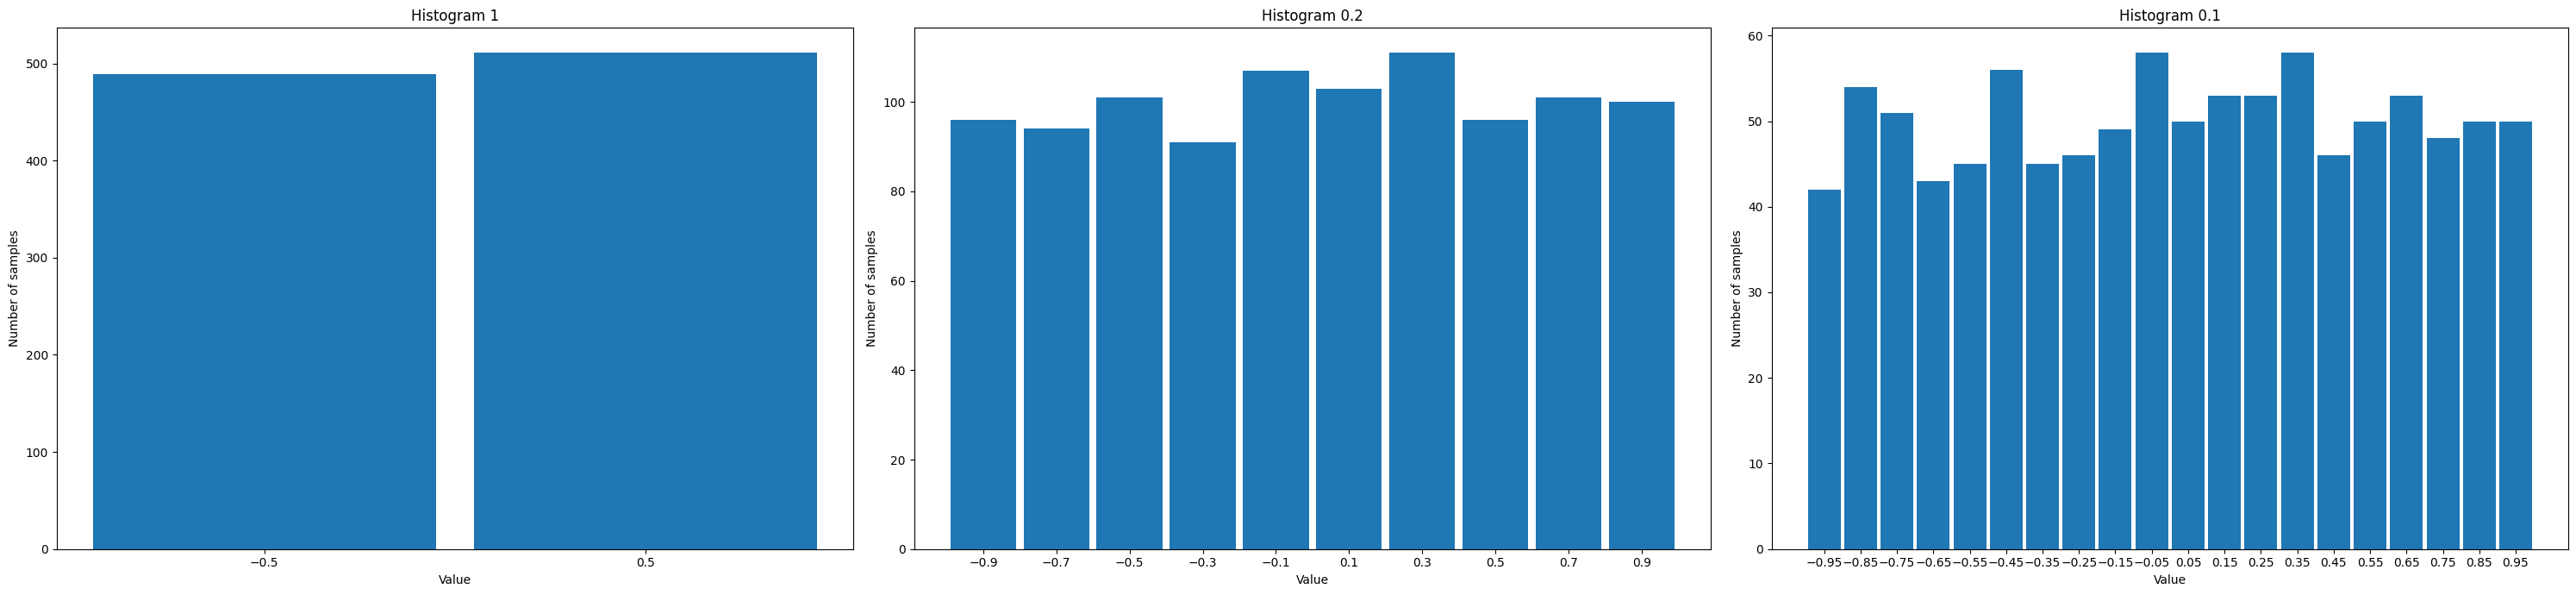

In [9]:
diff = df.loc[:, 'data'].max() - df.loc[:, 'data'].min()

fig, axs = plt.subplots(1, 3, figsize=(30, 7))
axs[0].hist(df.loc[:, 'data'], bins=int(diff / 1), rwidth=0.9)
axs[1].hist(df.loc[:, 'data'], bins=int(diff / 0.2), rwidth=0.9)
axs[2].hist(df.loc[:, 'data'], bins=int(diff / 0.1), rwidth=0.9)

axs[0].set(xlabel='Value', ylabel='Number of samples', title='Histogram 1')
axs[0].set_xticks(np.arange(-0.5, 1.0, 1))

axs[1].set(xlabel='Value', ylabel='Number of samples', title='Histogram 0.2')
axs[1].set_xticks(np.arange(-0.9, 1.0, 0.2))

axs[2].set(xlabel='Value', ylabel='Number of samples', title='Histogram 0.1')
axs[2].set_xticks(np.arange(-0.95, 1.0, 0.1))

plt.tight_layout()
plt.show()

### Zadanie 5 - Policzyć elementy

In [11]:
a = len(df[df['data'] < 0])
b = len(df[df['data'] > 0.3])
c = len(df[np.logical_or(df['data'] > 0.2, df['data'] < -0.2)])
d = len(df[df['data'].apply(lambda x: np.abs(x)) < 0.5])
print(f'x < 0: {a}, x > 0.3: {b}, |x| < 0.2: {c}, |x| > 0.3: {d}')

x < 0: 489, x > 0.3: 355, |x| < 0.2: 790, |x| > 0.3: 514


## Ćwiczenie 2

In [56]:
df = pd.read_csv('./data/dataset-2.csv', sep=';', names=['x', 'y_1', 'y_2'])
df

,x,y_1,y_2
0,0.127093,2.297832,2.204237
1,0.199832,2.263250,2.631990
2,0.204262,2.312624,1.964907
3,0.328726,2.318840,2.053462
4,0.375072,2.328794,2.996040
...,...,...,...
95,4.907971,6.241029,5.804627
96,4.909015,6.227188,5.453618
97,4.915838,6.348701,6.713920
98,4.916631,6.351749,5.530364


### Zadanie 1 i 2 - wykresy

In [57]:
from sklearn.linear_model import LinearRegression

x = np.array([[x] for x in df.loc[:, 'x'].to_numpy()])
y = df.loc[:, 'y_1'].to_numpy()
reg = LinearRegression(fit_intercept=True).fit(x, y)
a1, b1 = reg.coef_, reg.intercept_

x = np.array([[x] for x in df.loc[:, 'x'].to_numpy()])
y = df.loc[:, 'y_2'].to_numpy()
reg = LinearRegression(fit_intercept=True).fit(x, y)
a2, b2 = reg.coef_, reg.intercept_

In [58]:
df.loc[:, 'Y_1'] = a1 * df.loc[:, 'x'] + b1
df.loc[:, 'Y_2'] = a2 * df.loc[:, 'x'] + b2

df.loc[:, 'noise 1'] = df.loc[:, 'y_1'] - df.loc[:, 'Y_1']
df.loc[:, 'noise 2'] = df.loc[:, 'y_2'] - df.loc[:, 'Y_2']
df

,x,y_1,y_2,Y_1,Y_2,noise 1,noise 2
0,0.127093,2.297832,2.204237,2.207122,2.294183,0.090710,-0.089946
1,0.199832,2.263250,2.631990,2.269314,2.354429,-0.006064,0.277561
2,0.204262,2.312624,1.964907,2.273102,2.358098,0.039521,-0.393191
3,0.328726,2.318840,2.053462,2.379520,2.461186,-0.060681,-0.407723
4,0.375072,2.328794,2.996040,2.419147,2.499572,-0.090353,0.496468
...,...,...,...,...,...,...,...
95,4.907971,6.241029,5.804627,6.294826,6.253944,-0.053797,-0.449317
96,4.909015,6.227188,5.453618,6.295719,6.254809,-0.068531,-0.801191
97,4.915838,6.348701,6.713920,6.301552,6.260460,0.047149,0.453461
98,4.916631,6.351749,5.530364,6.302230,6.261117,0.049519,-0.730753


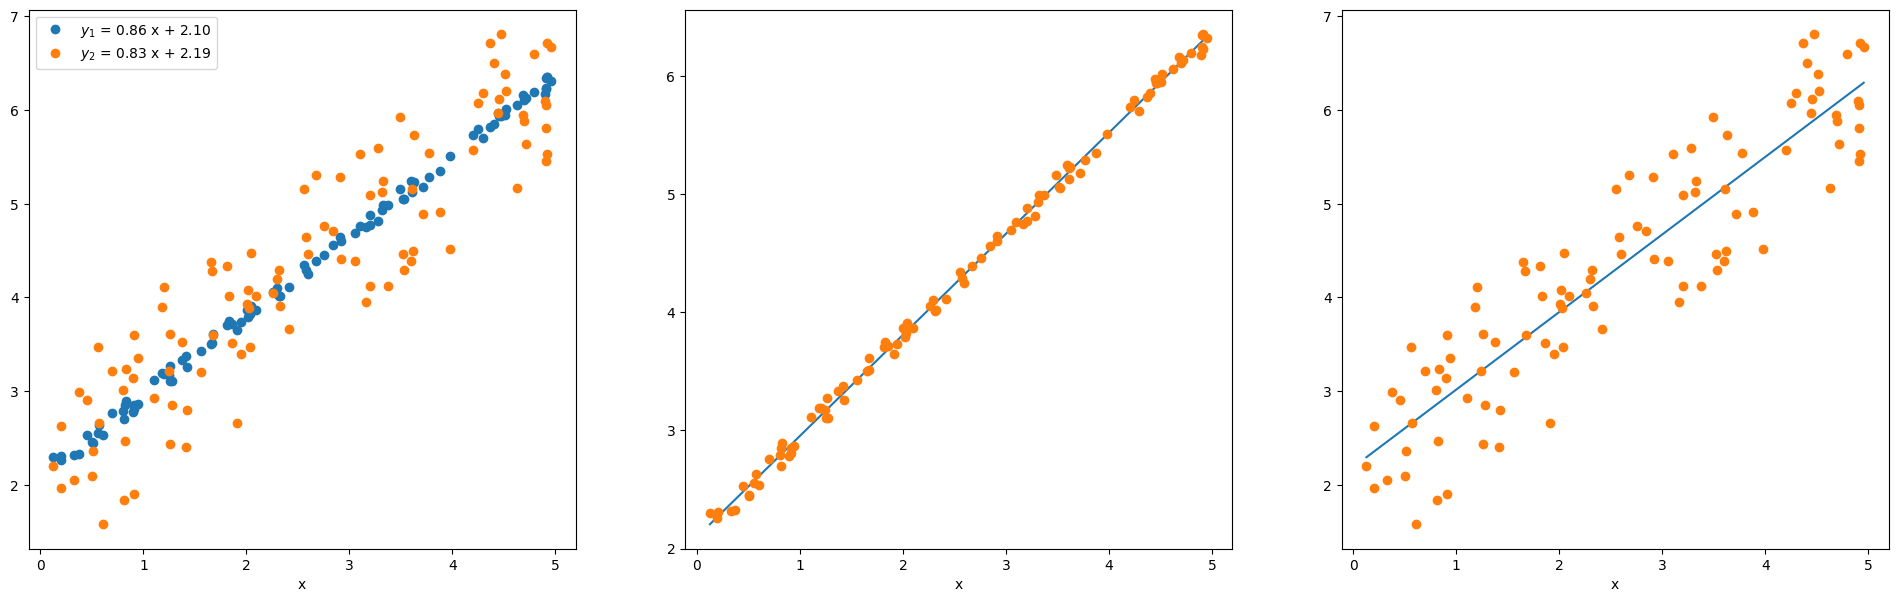

In [64]:
fig, ax = plt.subplots(1, 3, figsize=(24, 7))
df.plot(ax=ax[0], x='x', y=['y_1', 'y_2'], style='o')
df.plot(ax=ax[1], x='x', y=['Y_1', 'y_1'], style={'Y_1': '-', 'y_1': 'o'}, legend=False)
df.plot(ax=ax[2], x='x', y=['Y_2', 'y_2'], style={'Y_2': '-', 'y_2': 'o'}, legend=False)
ax[0].legend([f'$y_1$ = {float(a1):.2f} x + {float(b1):.2f}', f'$y_2$ = {float(a2):.2f} x + {float(b2):.2f}'])

In [14]:
class MyClass:
    def __init__(self):
        print('init')
    def __del__(self):
        print('del')
        
a = MyClass()
b = a
a = 2
b = 1

init
del
del
